# Neural Networks - Exercises to Theory 1

# Importing Packages

In [1]:
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
from typing import Callable

# Perceptron

## Exercise 1.1

Define the sigmoid function $\sigma(z) = \frac{1}{1+e^{-z}}$ and find the class (label) of the point
$$\vec{x} = [0.5, 1.4, 2.0],$$
that is produced (as the output) by the perceptron model with the weights and bias
$$ \vec{w} = [0.4, 0.3, 0.2], \ \ w_0 = 1.5$$

Recall that the sigmoid function returns a probability.

In [3]:
# def perceptron() -> int:
#     # Define perceptron method
#     pass

def perceptron(x_vals, weights, bias, activation_function):
    y_vals = activation_function(np.dot(x_vals, weights) + bias)
    return y_vals

In [6]:
sigma = lambda x: 1/(1+np.exp(-x))

# def sigma(x):
#     return 1/(1+np.exp(-x))

bias = 1.5
x_vals = np.array([0.5, 1.4, 2.0])
weights = np.array([0.4, 0.3, 0.2])


print(
    f"Given x values: {x_vals}, weights: {weights}, bias value {bias} and the binary classifier"
)
print(
    f"the output value of the perceptron is {perceptron(x_vals, weights, bias, sigma)}"
)

Given x values: [0.5 1.4 2. ], weights: [0.4 0.3 0.2], bias value 1.5 and the binary classifier
the output value of the perceptron is 0.9255320548339719


# Training and Test Data Sets

## Exercise 1.2

Plot one feature of the ``california_housing`` train data set against the corresponding target value.

Use a scatter plot.

In [7]:
housing = fetch_california_housing()
X, y = housing.data, housing.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [10]:
X_train.shape

torch.Size([16512, 8])

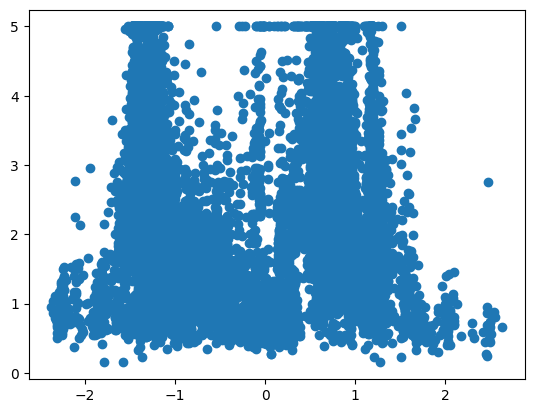

In [11]:
plt.scatter(X_train[:, 7], y_train)
plt.show()

# Linear and Non_linear models

## Exercise 1.3

Define the XOR function in a Lambda (anonymous) Python function syntax

In [ ]:
xor_method = None  # Place your solution here

# Building an artificial brain - Multilayer Perceptron (MLP)

## Exercise 1.4

Construct a Multilayer perceptron with any number of hidden layers.

Your function should have the following inputs:

- ``x_vals`` - input values;
- ``params_layers`` - weights and biases in all the layers
- ``sigma`` - activation function of hidden layers
- ``sigma_out`` - output activation function.

Note that that in the corresponding example the params_layers would have the form
``params_layer = [params_layer1, params_layer2]``

Check if your function produces the right output from the example from the corresponding theory section.


In [19]:
# def mlp(
#     x_vals: npt.NDArray[np.float64],
#     params_layers: list[tuple[npt.NDArray[np.float64], ...]],
#     sigma: Callable[[float], float],
#     sigma_out: Callable[[float], float],
# ) -> npt.NDArray[np.float64]:
#     # Place your solution here
#     pass

def mlp(
    x_vals: npt.NDArray[np.float64],
    params_layer1: tuple[npt.NDArray[np.float64], ...],
    params_layer2: tuple[npt.NDArray[np.float64], ...],
    sigma_one: Callable[[npt.NDArray[np.float64]], npt.NDArray[np.float64]],
    sigma_out: Callable[[npt.NDArray[np.float64]], npt.NDArray[np.float64]]
) -> npt.NDArray[np.float64]:
    w1_weights, b1_bias = params_layer1
    w2_weights, b2_bias = params_layer2
    z1_vals = sigma_one(w1_weights.T @ x_vals + b1_bias)
    y_vals = sigma_out(w2_weights.T @ z1_vals + b2_bias)
    return y_vals

In [20]:
x_vals = np.array([2.0, -1.0])
w1_weights = np.array([[0.2, 0.3, 0.46], [0.2, 0.65, 0.27]])
w2_weights = np.array([[0.27], [0.3], [0.05]])
b1_bias = np.zeros(3)
b2_bias = np.zeros(1)
params_layer1 = w1_weights, b1_bias
params_layer2 = w2_weights, b2_bias
params_layer = None  # Place your solution here
sigma = lambda a: np.maximum(0, a)
sigma_out = lambda a: 1 / (1 + np.exp(-a))

In [21]:
# Uncomment when ready
# mlp(x_vals, params_layer, sigma, sigma_out)
mlp(x_vals, params_layer1, params_layer2, sigma, sigma_out)

array([0.52161153])

# How to implement the network in PyTorch

## Exercise 1.5

Use PyTorch to define an MLP model that has the following architecture


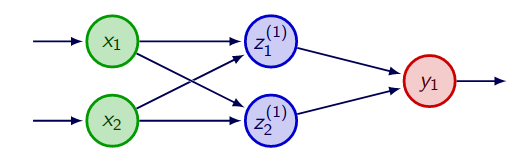

and the following weights and biases to the model

$$
W^{(1)} = \left[\begin{array}{ccc} 1.0 & 1.0 \\  1.0 & 1.0  \end{array} \right],
W^{(2)} = \left[\begin{array}{c}1. \\ -2.  \end{array} \right],
 \vec{b}^{(1)} =  \left[\begin{array}{ccc} 0 \\ -1 \end{array}\right],\
\vec{b}^{(2)} = 0
$$
- The hidden activation function is ReLu, that is, $\sigma_1(a) = \max\{0, a\}$
- The output activation function is linear (identity).


Show that this model reproduces the XOR function.

In [ ]:
w1_weights = np.array([[1.0, 1.0], [1.0, 1.0]])
w2_weights = np.array([[1], [-2]])
b1_bias = np.array([0, -1])
b2_bias = np.zeros(1)

In [ ]:
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        pass

    def forward(self, x_tensor: torch.Tensor) -> None:
        pass

In [ ]:
mlp_model = SimpleMLP()

In [ ]:
with torch.no_grad():
    # Set weights and biases
    pass

In [ ]:
x_vals = [[0, 0], [1, 1], [1, 0], [0, 1]]

# Convert the input values to a PyTorch tensor
x_tensor = None

In [ ]:
mlp_model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient calculation
    predictions = None

In [ ]:
print(predictions)

# Training procedure

## Exercise 1.6

Apply gradient descent method so that it finds the minimum of the function
$$E( \vec{w}) = \sin(w_1) + \cos(w_2),$$
where $\vec{w} = [w_1, w_2]$.
The initial point is $\vec{w}_0 = [1, 2]$.

You have to select the right learning rate and the number of iterations.

The minimum value of $E$ is 2.0.

In [ ]:
def grad_descent(
    gradient: Callable[[float], float],
    initial_point: float,
    iterations: int,
    learning_rate: float,
) -> list[float]:
    pass

In [ ]:
loss = None
partial_gradient_1 = None
partial_gradient_2 = None
gradient = None

learning_rate = None
initial_point = None
iterations = None

# Uncomment when ready
# vals = grad_descent(gradient, initial_point, iterations, learning_rate)
# loss(vals[-1])